https://nbviewer.org/github/bem4solvation/XPINNS/blob/xpinns/Main.ipynb

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.mplot3d import Axes3D
import math
import os
from matplotlib import cm

In [2]:
from classes.cartesian.Mesh import Mesh
from classes.NeuralNet import PINN_NeuralNet
from classes.cartesian.PINN import PINN
from classes.cartesian.PDE_Model import PDE_Model
from classes.cartesian.Preconditioner import Preconditioner
from classes.cartesian.Postprocessing import View_results
from classes.cartesian.XPINN import XPINN

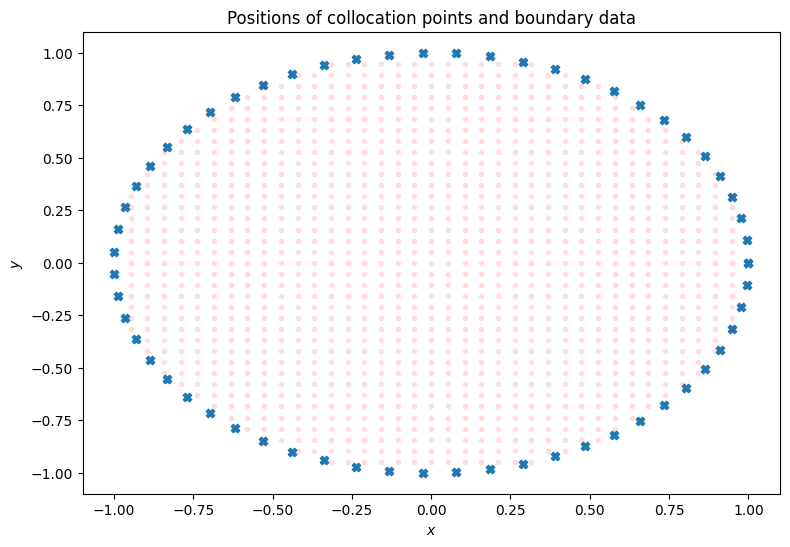

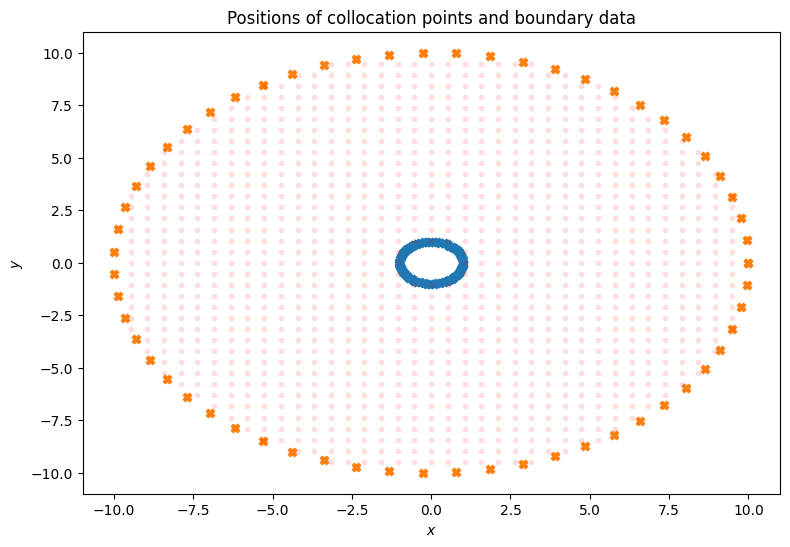

In [10]:
domain1 = ([-1,1],[-1,1])
PDE1 = PDE_Model()
domain1 = PDE1.set_domain(domain1)
PDE1.sigma = 0.04

lb = {'type':'I', 'value':None, 'fun':None, 'dr':None, 'r':1}
borders = {'1':lb}
ins_domain = {'rmax': 1}

mesh1 = Mesh(domain1, N_b=60, N_r=1500)
mesh1.create_mesh(borders, ins_domain)
mesh1.plot_points();



domain2 = ([-10,10],[-10,10])
PDE2 = PDE_Model()
domain2 = PDE1.set_domain(domain2)
PDE2.sigma = 0.04

lb = {'type':'I', 'value':None, 'fun':None, 'dr':None, 'r':1}
lb2 = {'type':'D', 'value':0, 'fun':None, 'dr':None, 'r':10}
borders = {'1':lb,'2':lb2}
ins_domain = {'rmax': 10,'rmin':1}

mesh2 = Mesh(domain2, N_b=60, N_r=1500)
mesh2.create_mesh(borders, ins_domain)
mesh2.plot_points();

XPINN_solver = XPINN(PINN)

XPINN_solver.adapt_PDEs([PDE1,PDE2],[1,10])
weights = {
        'w_r': 1,
        'w_d': 1,
        'w_n': 1,
        'w_i': 1
}
XPINN_solver.adapt_meshes([mesh1,mesh2],[weights,weights])

lr = ([1000,3000],[1e-2,5e-3,5e-4])
hyperparameters = {
        'input_shape_N': (None,2),
        'num_hidden_layers': 8,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh'
}

XPINN_solver.create_NeuralNets(PINN_NeuralNet,[lr,lr],[hyperparameters,hyperparameters])

In [11]:
XPINN_solver.solve(N=4000,flag_time=False)

In [12]:
from classes.cartesian.Postprocessing import View_results_X

In [13]:
Post = View_results_X(XPINN_solver,View_results)

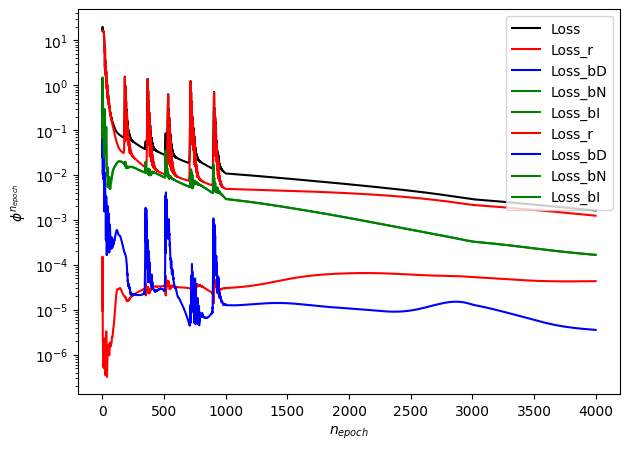

In [14]:
Post.plot_loss_history()

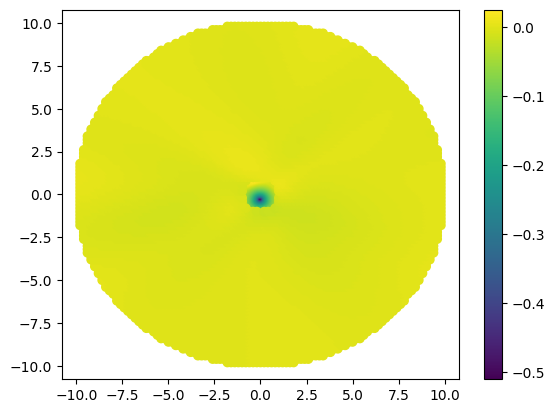

In [15]:
Post.plot_u_domain_countour()

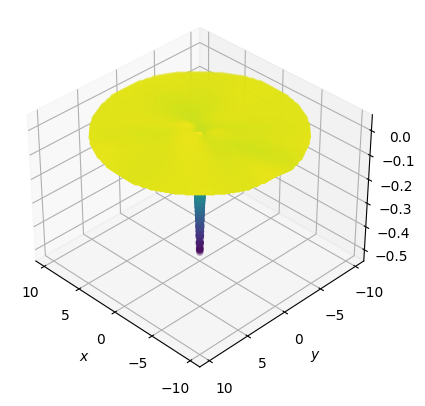

In [16]:
Post.plot_u_domain_surface()